# Some cool problems Using DNN with Keras
## Classify IMDB reviews

This is a Two-class classification, or binary classification. We will learn to classify movie reviews into "positive" reviews and "negative" reviews, just based on the text content of the reviews.

#### The IMDB dataset
The "IMDB dataset" is embedded in Keras and we can load it from there. It has a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

In [1]:
# First we load the data
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


Let's understand our dataset and do some exploring and preprocessing before diving in. Since reviews can contain any words with any number of words, we need to focus on words with high occurances instead of the odd words. The argument `num_words=10000` means that we will only keep the top 10,000 most frequently occurring words in the data. Rare words will be discarded. This allows us to work with vector data of manageable size. 

The variables `train_data` and `test_data` are lists of reviews, each review being a list of word indices. We will see later how can we decode them back to sequence of words for readability. But ML is friendly with numbers not words hence we needed the encoding a sequence of words. `train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive" reviews

In [2]:
#example of the data
print(len(train_data[0]))  # how many frequent words (up to 10k highest) were in review 0
train_data[0] # the encoding of the words itself

218


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

Just for us to understand the data a little more, lets see how can we change from numbers to words. However, keep in mind that we will need the numbers to be fed to the ML not the words. Let's see how can we get the words. First, we download the dictionary that maps beteween the word as the key and its index. Then for easy access, we revers the dictionary. Make every value to be a key and make every key to be a value. Now, we decode. We get every word corresponds to an index and join them together with a space.

In [3]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [4]:
word_index
#reverse_word_index
#print(decoded_review)

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

# Preparing the Data
We cannot feed lists of raw integers with different lengths into a neural network. We have to turn our lists into tensors. There are two ways we could do that:

- We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape (samples, word_indices), then use as first layer in our network a layer capable of handling such integer tensors. We call it an embedding layer. This is very famous usually with text data. I will leave it up to you to read more about it. Here is a link to get you started. https://towardsdatascience.com/neural-network-embeddings-explained-4d028e6f0526

- We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence  [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as first layer in our network a Dense layer, capable of handling floating point vector data.

We will go with the latter solution. Let's vectorize our data, which we will do manually for maximum clarity:

In [5]:
import numpy as np
x_train_encoded = np.zeros((len(train_data), 10000))
for i in range(len(train_data)):
    x_train_encoded[i,train_data[i]]=1
# Similarly for the test data
x_test_encoded = np.zeros((len(test_data), 10000))
for i in range(len(test_data)):
    x_test_encoded[i,test_data[i]]=1

Let's now build a a small neural network and see the performance

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(x_train_encoded, train_labels, epochs=10, batch_size=500, validation_data=(x_test_encoded, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 9s 346us/step - loss: 0.3811 - acc: 0.8361 - val_loss: 0.2966 - val_acc: 0.8804
Epoch 2/10
25000/25000 [==============================] - 5s 214us/step - loss: 0.1811 - acc: 0.9343 - val_loss: 0.3096 - val_acc: 0.8781
Epoch 3/10
25000/25000 [==============================] - 5s 182us/step - loss: 0.1173 - acc: 0.9606 - val_loss: 0.3644 - val_acc: 0.8722
Epoch 4/10
25000/25000 [==============================] - 5s 207us/step - loss: 0.0687 - acc: 0.9796 - val_loss: 0.4668 - val_acc: 0.8611
Epoch 5/10
25000/25000 [==============================] - 5s 188us/step - loss: 0.0315 - acc: 0.9926 - val_loss: 0.5439 - val_acc: 0.8642
Epoch 6/10
25000/25000 [==============================] - 5s 184us/step - loss: 0.0116 - acc: 0.9978 - val_loss: 0.6407 - val_acc: 0.8605
Epoch 7/10
25000/25000 [==============================] - 5s 201us/step - loss: 0.0033 - acc: 0.9996 - val_loss: 0.7308 - 

You can use `model.predict` and `model.predict_classes` to obtain the probabilities and the classes respectively. Find out the percision and recall. Plot probabilities confidence. Compare with logistic regression. Find out `auc` and `F1-score`. I will leave this up to you.

Let's now plot the history of the model. Specifically the history of accuracy and loss for both test data and training data

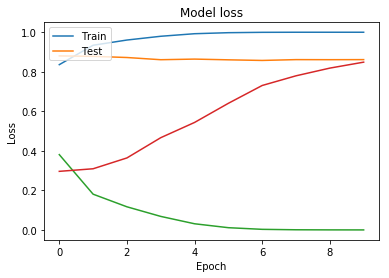

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

You can see that the model is overfitting fairly quickly but still acceptable accuracy. Lets add some dropout and regularization to reduce overfitting

In [9]:
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10000,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(50, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.01),  activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, kernel_regularizer=regularizers.l2(0.01), activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(x_train_encoded, train_labels, epochs=10, batch_size=500, validation_data=(x_test_encoded, test_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 7s 268us/step - loss: 1.5989 - acc: 0.7823 - val_loss: 0.9715 - val_acc: 0.8787
Epoch 2/10
25000/25000 [==============================] - 6s 229us/step - loss: 0.8583 - acc: 0.8721 - val_loss: 0.7412 - val_acc: 0.8736
Epoch 3/10
25000/25000 [==============================] - 6s 258us/step - loss: 0.6759 - acc: 0.8797 - val_loss: 0.6192 - val_acc: 0.8791
Epoch 4/10
25000/25000 [==============================] - 5s 207us/step - loss: 0.5825 - acc: 0.8840 - val_loss: 0.5517 - val_acc: 0.8782
Epoch 5/10
25000/25000 [==============================] - 5s 193us/step - loss: 0.5288 - acc: 0.8877 - val_loss: 0.5252 - val_acc: 0.8759
Epoch 6/10
25000/25000 [==============================] - 5s 195us/step - loss: 0.4986 - acc: 0.8916 - val_loss: 0.5171 - val_acc: 0.8712
Epoch 7/10
25000/25000 [==============================] - 5s 194us/step - loss: 0.4832 - acc: 0.8955 - val_loss: 0.5025 - 

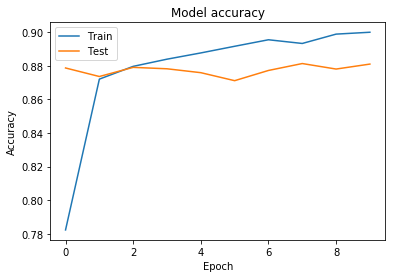

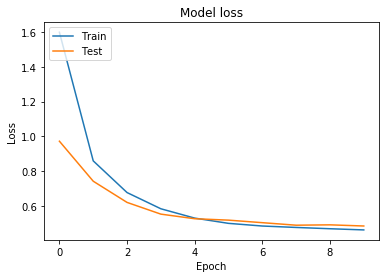

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

You can use `model.predict` and `model.predict_classes` to obtain the probabilities and the classes respectively. Find out the percision and recall. Plot probabilities confidence. Compare with logistic regression. Find out `auc` and `F1-score`

# DNN In Regression Problems
Now lets use Keras to predict the MPG of a car. A regression problem. Download the dataset using Keras then load it using pandas

In [12]:
import keras
import pandas as pd
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration', 'Model Year', 'Origin'] 
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()  # just to keep the raw data intact
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [13]:
dataset.isna().sum()
dataset = dataset.dropna()

Let's plot some of the variables. Seaborn library is really nice and can help you plot bunch of things with a single command

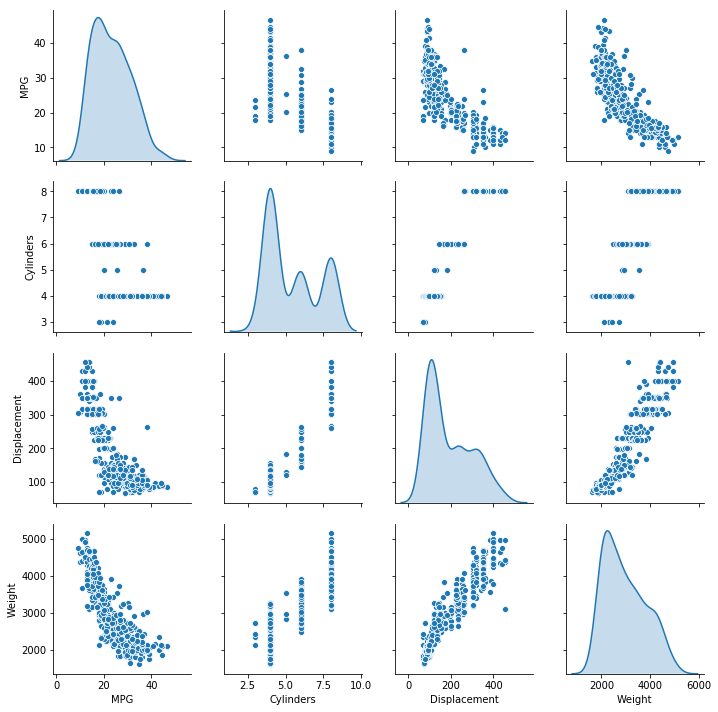

In [14]:
import seaborn as sns
dataset.isna().sum()
sns.pairplot(dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [15]:
from sklearn.model_selection import train_test_split
X = dataset.loc[:, dataset.columns != 'MPG']
Y = dataset['MPG']
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=66, test_size=0.2)

In [16]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
x_scaled_train=scaler.transform(X_train)
x_scaled_test = scaler.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [17]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])

In [18]:
history = model.fit(x_scaled_train, y_train, epochs=200, batch_size=20, validation_data= (x_scaled_test, y_test))

Train on 313 samples, validate on 79 samples
Epoch 1/200
313/313 [==============================] - 0s 2ms/step - loss: 582.8757 - mean_absolute_error: 22.8738 - mean_squared_error: 582.8757 - val_loss: 581.1733 - val_mean_absolute_error: 22.8023 - val_mean_squared_error: 581.1733
Epoch 2/200
313/313 [==============================] - 0s 94us/step - loss: 506.2791 - mean_absolute_error: 21.2430 - mean_squared_error: 506.2791 - val_loss: 465.1315 - val_mean_absolute_error: 20.2124 - val_mean_squared_error: 465.1315
Epoch 3/200
313/313 [==============================] - 0s 88us/step - loss: 346.0017 - mean_absolute_error: 17.0913 - mean_squared_error: 346.0017 - val_loss: 217.4210 - val_mean_absolute_error: 13.3402 - val_mean_squared_error: 217.4210
Epoch 4/200
313/313 [==============================] - 0s 85us/step - loss: 100.5250 - mean_absolute_error: 8.3837 - mean_squared_error: 100.5250 - val_loss: 45.4992 - val_mean_absolute_error: 5.6634 - val_mean_squared_error: 45.4992
Epoch 5/

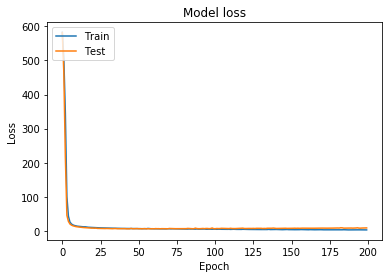

In [19]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [20]:
# predict MPG using keras model. Also evaluate
test_predictions = model.predict(x_scaled_test)
model.evaluate(x_scaled_test,y_test)

79/79 [==============================] - 0s 46us/step


[8.483839288542542, 2.125122601472879, 8.483839288542542]

Let's compare with linear regression

In [21]:
# Compare with Linear Regression
from sklearn.linear_model import LinearRegression
model_multi = LinearRegression().fit(x_scaled_train,y_train)
from sklearn.metrics import mean_squared_error
linear_test_prediction = model_multi.predict(x_scaled_test)
mean_squared_error(linear_test_prediction, y_test)

10.156384750744229

You can see that keras DNN produced smaller MSE. Let's check the spread in predictions

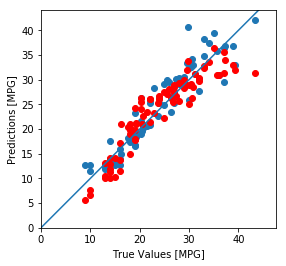

In [22]:
plt.scatter(y_test, test_predictions)
plt.scatter(y_test, linear_test_prediction, c='r')
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100])